### Topic modeling using NMF

Non-negative Matrix Factorization is a linear-algebraic model, that factors high-dimensional vectors into a low-dimensionality representation. 

* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

In [94]:
!pip install bokeh

In [95]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet

output_notebook()

Loading BokehJS ...

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
dbpedia_df = pd.read_csv('./datasets/dbpedia_csv/train.csv', 
                         skiprows=1, names = ['Label', 'Name', 'Text'])

In [66]:
dbpedia_df.shape

(559999, 3)

In [67]:
NUM_SAMPLES = 10000

In [68]:
dbpedia_df = dbpedia_df.sample(NUM_SAMPLES, replace=False).reset_index(drop=True)

In [69]:
dbpedia_df.head(5)

,Label,Name,Text
0,10,Hydrelia parvularia,Hydrelia parvularia is a moth in the Geometri...
1,1,Alimentos Polar,Alimentos Polar C.A. is an Empresas Polar sub...
2,12,Avant (album),Avant is the self-titled fifth studio album f...
3,12,Bob McGrath from Sesame Street,Bob McGrath from Sesame Street is an studio a...
4,12,Forgotten Freshness Volume 3,Forgotten Freshness Volume 3 is a rarities al...


### DBPedia classes

- Company
- EducationalInstitution
- Artist
- Athlete
- OfficeHolder
- MeanOfTransportation
- Building
- NaturalPlace
- Village
- Animal
- Plant
- Album
- Film
- WrittenWork

In [70]:
sorted(dbpedia_df['Label'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [71]:
X = dbpedia_df['Text']

In [72]:
X.head()

0     Hydrelia parvularia is a moth in the Geometri...
1     Alimentos Polar C.A. is an Empresas Polar sub...
2     Avant is the self-titled fifth studio album f...
3     Bob McGrath from Sesame Street is an studio a...
4     Forgotten Freshness Volume 3 is a rarities al...
Name: Text, dtype: object

In [73]:
count_vectorizer = CountVectorizer(stop_words='english')

transformed_vector = count_vectorizer.fit_transform(X)

In [74]:
transformed_vector.shape

(10000, 47577)

In [75]:
feature_names = count_vectorizer.get_feature_names()

In [76]:
len(feature_names)

47577

In [77]:
feature_names[1000:1005]

['290', '290000', '2903', '290g', '292']

In [78]:
NUM_TOPICS = 14

nmf_model = NMF(n_components=NUM_TOPICS)

nmf = nmf_model.fit_transform(transformed_vector)

In [79]:
nmf.shape

(10000, 14)

In [80]:
nmf[:2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.08629067, 0.        , 0.        , 0.        ,
        0.00030945, 0.        , 0.00027892, 0.        ],
       [0.00149566, 0.00373887, 0.0013845 , 0.        , 0.        ,
        0.        , 0.        , 0.0058512 , 0.        , 0.        ,
        0.00038441, 0.01768815, 0.        , 0.        ]])

Variational parameters for topic word distribution. lda_model.components_[t, w] can be viewed as pseudocount that represents the number of times the word w was assigned to topic t

In [81]:
nmf_model.components_.shape

(14, 47577)

In [82]:
def get_topic(identifier, top_words=10):
    
    for topic_id, topic_word_probs in enumerate(nmf_model.components_):

        if topic_id == identifier:
            top_feature_names = [feature_names[i] for i in topic_word_probs.argsort()[: -top_words - 1 : -1]]
            
            return " ".join(top_feature_names)

In [83]:
for i in range(14):
    print("Topic %d:" % (i))

    print(get_topic(i, top_words=3))

Topic 0:
school high public
Topic 1:
mi km village
Topic 2:
historic house built
Topic 3:
album released band
Topic 4:
district village county
Topic 5:
film directed written
Topic 6:
species family genus
Topic 7:
river lake tributary
Topic 8:
born american football
Topic 9:
navy united class
Topic 10:
university college state
Topic 11:
company based founded
Topic 12:
holcaspis broun 1984
Topic 13:
new york city


In [84]:
topic_id_topic_mapping = {}

for i in range(14):
    topic_id_topic_mapping[i] = get_topic(i, top_words=3)
    
topic_id_topic_mapping

{0: 'school high public',
 1: 'mi km village',
 2: 'historic house built',
 3: 'album released band',
 4: 'district village county',
 5: 'film directed written',
 6: 'species family genus',
 7: 'river lake tributary',
 8: 'born american football',
 9: 'navy united class',
 10: 'university college state',
 11: 'company based founded',
 12: 'holcaspis broun 1984',
 13: 'new york city'}

In [85]:
topic_to_doc_mapping = {}
topic_list = []
topic_names = []

for i in range(NUM_SAMPLES):
    most_likely_topic =  nmf[i].argmax()

    if most_likely_topic not in topic_to_doc_mapping:
        topic_to_doc_mapping[most_likely_topic] = []

    topic_to_doc_mapping[most_likely_topic].append(i)

    topic_list.append(most_likely_topic)
    topic_names.append(topic_id_topic_mapping[most_likely_topic])

dbpedia_df['Most_Likely_Topic'] = topic_list
dbpedia_df['Most_Likely_Topic_Names'] = topic_names

In [86]:
print(topic_to_doc_mapping[0][:100])

[13, 42, 65, 116, 123, 136, 151, 189, 191, 198, 201, 203, 204, 230, 231, 245, 258, 263, 265, 271, 280, 290, 312, 323, 347, 356, 374, 386, 448, 467, 468, 477, 492, 505, 613, 663, 676, 732, 745, 747, 763, 801, 831, 865, 868, 880, 886, 891, 906, 915, 920, 923, 929, 935, 944, 954, 962, 995, 996, 1026, 1064, 1082, 1119, 1134, 1163, 1175, 1180, 1182, 1200, 1236, 1238, 1275, 1279, 1285, 1302, 1313, 1328, 1349, 1364, 1372, 1373, 1376, 1379, 1388, 1405, 1426, 1432, 1508, 1524, 1530, 1532, 1534, 1573, 1633, 1658, 1763, 1795, 1814, 1829, 1841]


In [87]:
topic_of_interest = 13

doc_ids = topic_to_doc_mapping[topic_of_interest][:4]

for doc_index in doc_ids:
    print(X.iloc[doc_index])

 The Press of Atlantic City is the fourth largest daily newspaper in New Jersey. Based in Pleasantville New Jersey it is the primary newspaper for southeastern New Jersey and the Jersey Shore. The Newspaper Designated Market runs from Waretown in Southern Ocean county (exit 69 on the Garden State Parkway) down to Cape May (exit 0). It also reaches west to Cumberland County New Jersey.
 Greenleaf Music is an independent jazz record label owned by American trumpeter/composer Dave Douglas. Founded in 2005 by Douglas and Mike Friedman Greenleaf Music has released albums by Dave Douglas Donny McCaslin Nicole Mitchell / Harrison Bankhead / Hamid Drake Kneebody Michael Bates Curtis MacDonald Linda Oh and Matt Ulery. The label operates in Chicago and New York and is distributed worldwide.
 Robin Figren (born March 7 1988) is a professional Swedish ice hockey player. He is currently playing for the Frölunda HC in the Elitserien. Figren was selected 70th overall in the third round of the 2006 NH

In [88]:
dbpedia_df.sample(100)

,Label,Name,Text,Most_Likely_Topic,Most_Likely_Topic_Names
2038,5,John Rowan (Kentucky),John Rowan (July 12 1773 – July 13 1843) was ...,8,born american football
3880,8,Bloody Pond (Massachusetts),Bloody Pond is a 98-acre (400000 m2) natural ...,1,mi km village
8675,10,Chinese red-headed centipede,The Chinese red-headed centipede also known a...,6,species family genus
4475,11,Sempervivum calcareum,Sempervivium calcareum is a succulent perenni...,6,species family genus
9936,10,Eurithia vivida,Eurithia vivida is a European species of fly ...,6,species family genus
6727,2,Woodroffe High School (Ottawa),Woodroffe High School is a secondary school s...,0,school high public
9242,6,USS Barbel (SS-316),USS Barbel (SS-316) a Balao-class submarine w...,9,navy united class
1625,4,Son Si-hyun,Son Si-Hyun (Hangul: 손시헌 Hanja: 孫是憲) (born Oc...,8,born american football
1563,5,Jimmy Womack,Reverend James Jimmy Womack (born November 30...,4,district village county
4013,13,The Devil Horse,The Devil Horse (1932) is a Mascot movie seri...,5,film directed written


In [89]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, init = 'pca', random_state = 0)

In [90]:
nmf_2d_tsne = tsne.fit_transform(nmf)

In [91]:
nmf_df_tsne = pd.DataFrame(nmf_2d_tsne)

nmf_df_tsne.shape

(10000, 2)

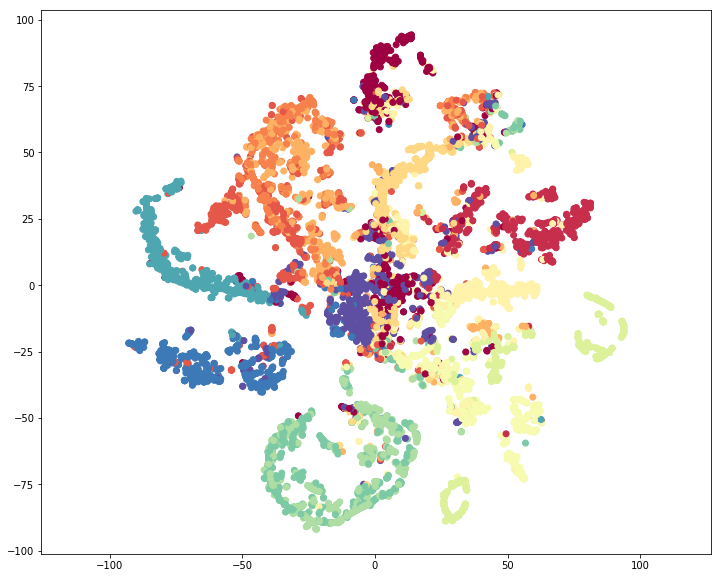

In [92]:
plt.subplots(figsize = (12, 10))
plt.axis('equal');

plt.scatter(nmf_df_tsne[0], nmf_df_tsne[1], c = dbpedia_df['Label'], cmap = plt.cm.Spectral)

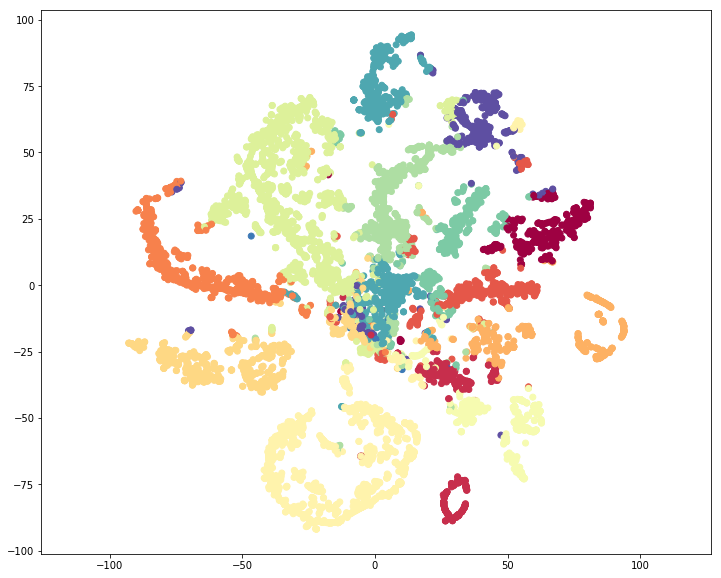

In [93]:
plt.subplots(figsize = (12, 10))
plt.axis('equal');

plt.scatter(nmf_df_tsne[0], nmf_df_tsne[1], c = dbpedia_df['Most_Likely_Topic'], cmap = plt.cm.Spectral)

In [101]:
df = pd.DataFrame(nmf_df_tsne)

df.columns = ['x', 'y']

df.head()

,x,y
0,-2.908568,-46.975872
1,3.173738,-18.804682
2,-85.980759,29.036842
3,-85.631790,26.813822
4,-55.425098,-1.567675


In [103]:
df['topic'] = dbpedia_df['Most_Likely_Topic_Names']

df.head()

,x,y,topic
0,-2.908568,-46.975872,species family genus
1,3.173738,-18.804682,company based founded
2,-85.980759,29.036842,album released band
3,-85.631790,26.813822,album released band
4,-55.425098,-1.567675,album released band


In [107]:
source = ColumnDataSource(ColumnDataSource.from_df(df))

labels = LabelSet(x="x", y="y", text="topic", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)

show(plot, notebook_handle=True)